In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

#### Political blogs


In [2]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

{1490, 16718} undirected simple Int64 graph

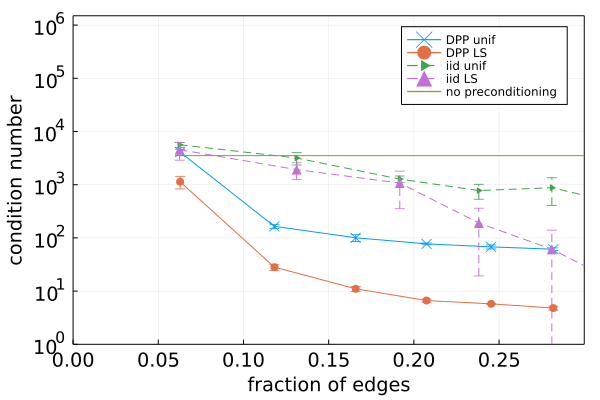

In [3]:
rng = Random.default_rng()

meta_g = MetaGraph(g)

for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.1
n_tot = 6
n_rep = 3

D = cond_numbers(meta_g,q,n_tot,n_rep,rng)


x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
margins = 0.1*2Plots.cm)

ylims!((1e0,1e4))
xlims!((0.05,0.3))
yticks!([1,1e1,1e2,1e3,1e4])


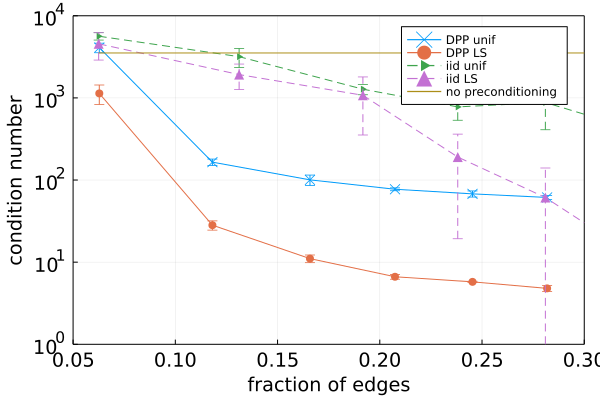

In [5]:
x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = "DPP unif",
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "DPP LS",
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid unif",
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = "iid LS",
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
margins = 0.1*2Plots.cm)

ylims!((1e0,1e4))
xlims!((0.05,0.3))
yticks!([1,1e1,1e2,1e3,1e4])

In [27]:

foldername = "figures/"
type = "precond_"
name = type*real_g*string(q)*".pdf"
savefig(foldername*name)


#### Books about US politics


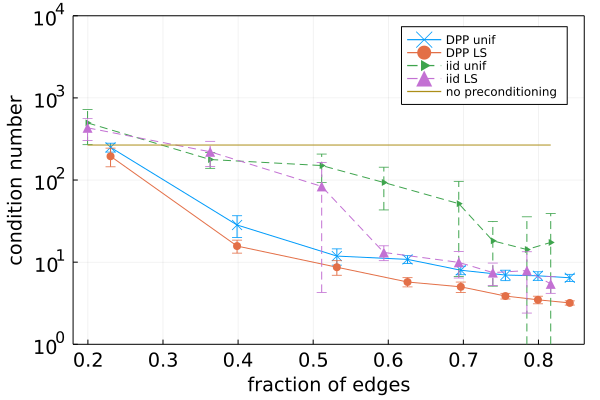

In [13]:
real_g = "polbooks.gml"

g = loadgraph(real_g, GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

meta_g = MetaGraph(g)

for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.1
n_tot = 8
n_rep = 10

D = cond_numbers(meta_g,q,n_tot,n_rep,rng)


x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_unif"]
y_er = D["cnd_nb_dpp_unif_std"]
plot(x,y,yerror=y_er,xlabel = "fraction of edges", yaxis=:log,labels = "DPP unif",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

x = D["percent_edges_dpp"]
y = D["cnd_nb_dpp_lev"]
y_er = D["cnd_nb_dpp_lev_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "DPP LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_unif"]
y_er = D["cnd_nb_iid_unif_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

x = D["percent_edges_iid"]
y = D["cnd_nb_iid_lev"]
y_er = D["cnd_nb_iid_lev_std"]
plot!(x,y,yerror=y_er, yaxis=:log,labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)

x = D["percent_edges_iid"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)

ylims!((1e0,1e4))
#xlims!((0,0.3))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])



In [19]:
foldername = "figures/"
type = "precond_"
name = type*real_g*string(q)*".pdf"
savefig(foldername*name)
